# Purpose of the analysis
Look for possible correlations between Economic Freedom and Country's GDP per capita

# Import libraries

In [5]:
import pandas as pd
import numpy as no
import matplotlib as plt
import matplotlib.pyplot as plt

# Read data from CSV

In [71]:
# Source for GDP per capita data: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD
 
# Source for economic freedom data: https://www.heritage.org/index/explore?u=637470799817780528

gdp = pd.read_csv('GDP_per_capita.csv')
ec_index = pd.read_csv('index2021_data.csv')
pd.set_option('display.max_rows', None)

# Clean and Merge data

In [84]:
# Choose columns needed for analysis
gdp =gdp[['Country Name', '2021']]
ec_index = ec_index[['Country Name', '2021 Score']]

# Merge two dataframes
merged_data = pd.merge(gdp, ec_index, on = 'Country Name')

# Rename columns 
merged_data.columns = ['Country Name', 'Value', 'Score']

# Drop empty rows
merged_data = merged_data.dropna(axis = 0, how = 'any')


# Plot data on scatter plot chart

Text(0, 0.5, 'GDP per capital')

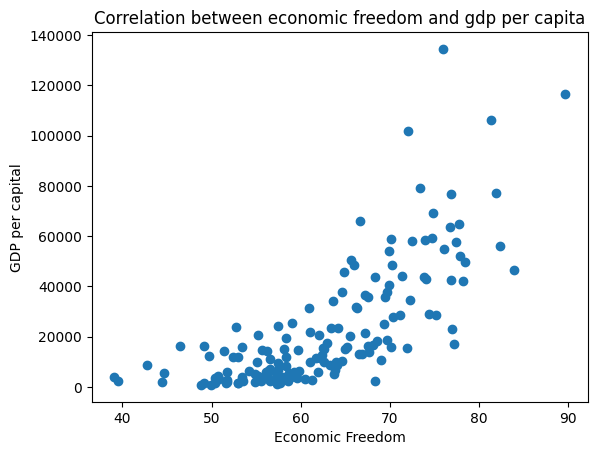

In [119]:
x = merged_data.Score
y = merged_data.Value
plt.scatter(x,y)
plt.title('Correlation between economic freedom and gdp per capita')
plt.xlabel('Economic Freedom')
plt.ylabel('GDP per capital')

## Adding Hover visibility and a Regression Line

In [138]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(merged_data, x = 'Score', y = 'Value',  trendline= 'ols', log_x = True, color = 'Score', hover_data=['Country Name', 'Score'])
fig.show()